#  INDEX

<table align="left">
    <tr>
        <td width="8%">
            <img src="todo.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                        <b>Feature selection techniques.
                            <ul type="i">
                                <li>A. filtering method
                                    <ul type="i">
                                        <li>a. Information Gain</li>
                                        <li>b. Vif</li>
                                    </ul>
                                <li>B. wrapping method
                                <ul type="i">
                                    <li>a. Forward Feature Selection</li>
                                    <li>b. Backward Feature Elimination</li>
                                    <li>d. Recursive Feature Elimination</li>
                                     </ul>
                                <li>C. Embedded method
                                    <ul type="i">
                                    <li>LASSO Regularization (L1)</li>
                                    <li>Random Forest Importance</li>
                                     </ul>
                                <ul type="i">
                                </ul>
                              <li>Evaluating Feature selection Models.
                             <li>Result table.
                             <li>fiding best Feature selection Technique and Conclusion.
                        </ol>

In [ ]:
from sklearn.preprocessing import scale 

## missing values treatment
import matplotlib.pyplot as plt
import seaborn as sns

# import functions to perform feature selection
from mlxtend.feature_selection import SequentialFeatureSelector as sfs
from sklearn.feature_selection import RFE

## feature scaling
import statsmodels
import statsmodels.api as sm

## OLS model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn import metrics
# 'Statsmodels' is used to build and analyze various statistical models
import statsmodels.stats.api as sms
import statsmodels.formula.api as smf
from statsmodels.tools.eval_measures import rmse
from statsmodels.compat import lzip
from statsmodels.stats.outliers_influence import variance_inflation_factor

# 'SciPy' is used to perform scientific computations
from scipy.stats import shapiro
from scipy import stats


# 'Statsmodels' is used to build and analyze various statistical models
import statsmodels
import statsmodels.api as sm
import statsmodels.stats.api as sms
import statsmodels.formula.api as smf
from statsmodels.tools.eval_measures import rmse
from statsmodels.compat import lzip
from statsmodels.formula.api import ols
from statsmodels.stats.outliers_influence import variance_inflation_factor
# 'SciPy' is used to perform scientific computations
from scipy.stats import shapiro
from scipy import stats

#libraries Information_gini
from sklearn.feature_selection import SelectPercentile
from sklearn.feature_selection import mutual_info_regression

import pandas as pd
import numpy as np



### set Options

In [ ]:
np.set_printoptions(suppress=False)

### Loadig data set 

In [441]:
# read csv file using pandas
df_train = pd.read_csv('df_train.csv',index_col='Unnamed: 0')
df_test = pd.read_csv('df_test.csv',index_col='Unnamed: 0')


### Target feature Distrebution

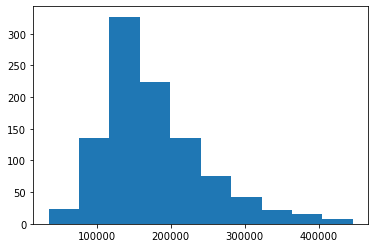

In [316]:
#y_train_log=np.log(y_train)
plt.hist(df_train['Property_Sale_Price'])
plt.show()

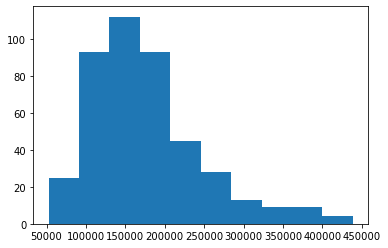

In [318]:
#y_train_log=np.log(y_train)
plt.hist(df_test['Property_Sale_Price'])
plt.show()

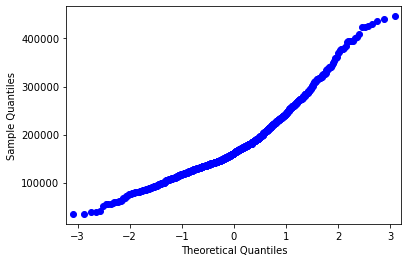

In [320]:
sm.qqplot(df_train['Property_Sale_Price'])
plt.show()

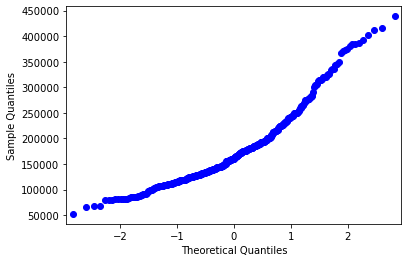

In [317]:
sm.qqplot(df_test['Property_Sale_Price'])
plt.show()

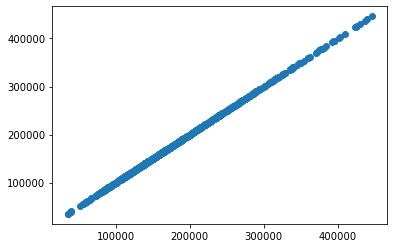

In [324]:
plt.scatter(df_train[target],df_train[target])
plt.show()

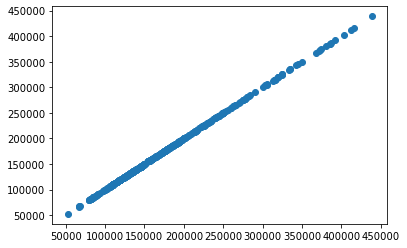

In [325]:
plt.scatter(df_test[target],df_test[target])
plt.show()

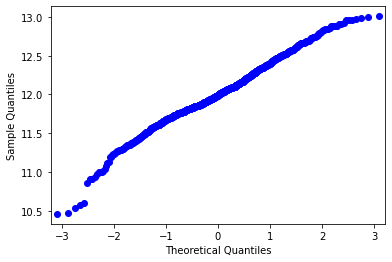

In [327]:
y_train_log=np.log(df_train[target])
sm.qqplot(y_train_log)
plt.show()

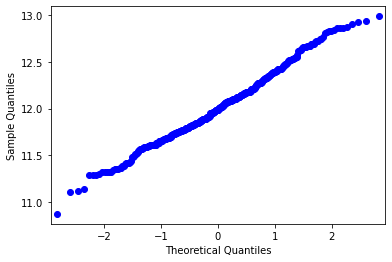

In [328]:
y_test_log=np.log(df_test[target])
sm.qqplot(y_test_log)
plt.show()

In [329]:
df_train[target].skew()


1.0834633197359285

In [330]:
np.log(df_train[target]).skew()

-0.17725044666880346

In [339]:
columns=['model_name','RMSE','AdjR_Square','R_Square','AIC','BIC','No. of Features']
result=pd.DataFrame(columns=columns)


In [340]:
target='Property_Sale_Price'
X_train_bckup=df_train.drop(target,axis=1)
X_test_bckup=df_test.drop(target,axis=1)
y_train=df_train[target]
y_test=df_test[target]
y_train_log=np.log(y_train)
y_test_log=np.log(y_test)
X_train_bckup.drop('Unnamed: 0',axis=1,inplace=True)
X_test_bckup.drop('Unnamed: 0',axis=1,inplace=True)
X_train=X_train_bckup.copy()
X_test=X_test_bckup.copy()

In [341]:
X_train=X_train_bckup.copy()
X_test=X_test_bckup.copy()
X_train=sm.add_constant(X_train)
X_test=sm.add_constant(X_test)
model = sm.OLS(endog=y_train_log, exog=X_train).fit()
print(model.summary())

                             OLS Regression Results                            
Dep. Variable:     Property_Sale_Price   R-squared:                       0.904
Model:                             OLS   Adj. R-squared:                  0.890
Method:                  Least Squares   F-statistic:                     66.75
Date:                 Sat, 15 May 2021   Prob (F-statistic):               0.00
Time:                         03:52:33   Log-Likelihood:                 701.09
No. Observations:                 1007   AIC:                            -1152.
Df Residuals:                      882   BIC:                            -537.8
Df Model:                          124                                         
Covariance Type:             nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const 

Text(0, 0.5, 'Predicted values')

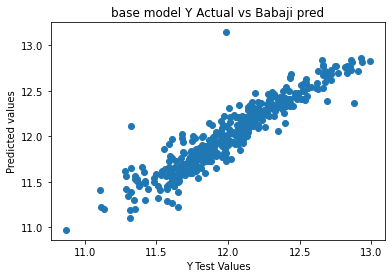

In [342]:
y_pred=model.predict(X_test)
rmse1=mean_squared_error(y_test_log,y_pred)**2
x_size=X_train.shape[1]
                                    
result=result.append(pd.Series({'model_name':'base_model','RMSE':rmse1,'AdjR_Square':model.rsquared_adj,'R_Square':model.rsquared,'AIC':model.aic,'BIC':model.bic,'No. of Features':x_size}),ignore_index=True)

plt.scatter(y_test_log,y_pred)
plt.title('base model Y Actual vs Babaji pred')
plt.xlabel('Y Test Values')
plt.ylabel('Predicted values')

In [343]:
result

,model_name,RMSE,AdjR_Square,R_Square,AIC,BIC,No. of Features
0,base_model,0.000376,0.890169,0.903706,-1152.179912,-537.83855,129


### 1) Information Gain

In [231]:
#libraries
from sklearn.feature_selection import SelectPercentile
from sklearn.feature_selection import mutual_info_regression

#libraries Information_gini
def information_gini_selection_with_OLS(k):
    global X_train_bckup,y_train_log,x_features
    perc=k
    X_train=X_train_bckup.copy()
    # determine the mutual information
    mutual_info = mutual_info_regression(X_train, y_train_log)
    mutual_info = pd.Series(mutual_info)
    mutual_info.index = X_train.columns
    mutual_info.sort_values(ascending=False)
    ## Selecting the top 20 percentile
    selected_top_columns = SelectPercentile(mutual_info_regression, percentile=perc)
    selected_top_columns.fit(X_train, y_train_log)
    x_features=X_train.columns[selected_top_columns.get_support()]
    return x_features

## information gini calculation

In [292]:
information_gini_selection_with_OLS(k=60)

Index(['LotFrontage', 'LotArea', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea',
       'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', 'GrLivArea', 'BedroomAbvGr',
       'KitchenAbvGr', 'Fireplaces', 'GarageCars', 'WoodDeckSF',
       'TotalFullBath', 'TotalHalfBath', 'TotalPorch', 'Exterior1st_HdBoard',
       'Exterior1st_MetalSd', 'Exterior1st_Others', 'Exterior1st_Plywood',
       'Exterior1st_VinylSd', 'Exterior1st_Wd Sdng', 'Exterior2nd_MetalSd',
       'Exterior2nd_VinylSd', 'Exterior2nd_Wd Sdng', 'Alley_Pave',
       'Neighborhood_low_frequency', 'CentralAir_Y', 'HouseStyle_2Story',
       'RoofStyle_Gable', 'RoofStyle_Hip', 'MasVnrType_BrkFace',
       'MasVnrType_None', 'MasVnrType_Stone', 'Foundation_CBlock',
       'Foundation_PConc', 'Foundation_Slab', 'BsmtFinType1_GLQ',
       'BsmtFinType1_Rec', 'BsmtFinType1_Unf', 'BsmtFinType1_Unknown',
       'BsmtFinType2_Unknown', 'Electrical_SBrkr', 'Functional_Min2',
       'Functional_Typ', 'GarageType_BuiltIn', 'GarageType_Detchd',
    

## VIF 

In [221]:
X_train=X_train_bckup.copy()

In [222]:
#displaying multicollinearity 
def vif_features():
    #Calculate the VIF for each numeric variable
    global X_train,y_train,vif_features
    num_features=[i for i in X_train.columns if X_train[i].dtype!='O']
    df_numeric_features_vif=X_train[num_features].select_dtypes(include=[np.number])
    vif = pd.DataFrame()
    vif["VIF_Factor"] = [variance_inflation_factor(df_numeric_features_vif.values, i) for i in range(df_numeric_features_vif.shape[1])]
    vif["Features"] = df_numeric_features_vif.columns
    vif.sort_values('VIF_Factor', ascending = False).reset_index(drop = True)
    for ind in range(len(df_numeric_features_vif.columns)):
        vif = pd.DataFrame()
        vif["VIF_Factor"] = [variance_inflation_factor(df_numeric_features_vif.values, i) for i in range(df_numeric_features_vif.shape[1])]
        vif["Features"] = df_numeric_features_vif.columns
        multi = vif[vif['VIF_Factor'] > 10]
        if(multi.empty == False):
            df_sorted = multi.sort_values(by = 'VIF_Factor', ascending = False)
        else:
            print(vif)
            break
        if (df_sorted.empty == False):
            df_numeric_features_vif = df_numeric_features_vif.drop(df_sorted.Features.iloc[0], axis=1)
        else:
            print(vif)
    vif_features=vif[(vif['VIF_Factor']<=10)]['Features'].to_list()
    return vif_features

In [224]:
vif_features()

    VIF_Factor        Features
0     5.452197      MasVnrArea
1     9.543950      BsmtFinSF1
2     8.869831      BsmtFinSF2
3     9.919510       BsmtUnfSF
4     2.969629      Fireplaces
..         ...             ...
76    2.028437  Property_Shape
77    8.151776     LandContour
78    4.859762       LotConfig
79    5.673605    BsmtExposure
80    9.927342       HeatingQC

[81 rows x 2 columns]


['MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'Fireplaces',
 'WoodDeckSF',
 'PoolArea',
 'MoSold',
 'TotalHalfBath',
 'TotalPorch',
 'Exterior1st_HdBoard',
 'Exterior1st_MetalSd',
 'Exterior1st_Others',
 'Exterior1st_Plywood',
 'Exterior1st_Wd Sdng',
 'Exterior2nd_Other',
 'Exterior2nd_Plywood',
 'Exterior2nd_VinylSd',
 'Exterior2nd_Wd Sdng',
 'Neighborhood_low_frequency',
 'HouseStyle_1.5Unf',
 'HouseStyle_1Story',
 'HouseStyle_2.5Fin',
 'HouseStyle_2.5Unf',
 'HouseStyle_2Story',
 'HouseStyle_SFoyer',
 'HouseStyle_SLvl',
 'RoofStyle_Gambrel',
 'RoofStyle_Hip',
 'RoofStyle_Mansard',
 'RoofMatl_Gable',
 'RoofMatl_Tar&Grv',
 'RoofMatl_WdShngl',
 'MasVnrType_BrkFace',
 'MasVnrType_Stone',
 'Foundation_CBlock',
 'Foundation_PConc',
 'Foundation_Slab',
 'Foundation_Stone',
 'Foundation_Wood',
 'BsmtFinType1_BLQ',
 'BsmtFinType1_GLQ',
 'BsmtFinType1_LwQ',
 'BsmtFinType1_Rec',
 'BsmtFinType1_Unf',
 'BsmtFinType2_BLQ',
 'BsmtFinType2_GLQ',
 'BsmtFinType2_LwQ',
 'BsmtFinType2_Rec'

# Wrapping Method

## 1)Feature selection

In [94]:
def forword_selection():
    global X_train,y_train_log,for_features
    linreg = LinearRegression()
    linreg_forward = sfs(estimator = linreg, k_features = 'best', forward = True, verbose = 2, scoring = 'r2', n_jobs = -1)
    sfs_forward = linreg_forward.fit(X_train, y_train_log)
    for_features=list(sfs_forward.k_feature_names_)
    return len(for_features)

In [95]:
forword_selection()

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 128 out of 128 | elapsed:    1.3s finished

[2021-05-14 21:36:03] Features: 1/128 -- score: 0.5171322668131307[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 127 out of 127 | elapsed:    1.3s finished

[2021-05-14 21:36:04] Features: 2/128 -- score: 0.662854999226141[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 126 out of 126 | elapsed:    1.3s finished

[2021-05-14 21:36:06] Features: 3/128 -- score: 0.7329709703666814[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 125 out of 125 | elapsed:    1.2s finished

[2021-05-14 21:36:07] Features: 4/128 -- score: 0.7738747463451437[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 124 out of 124 | elapsed:    1.4s finishe

[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:    1.7s finished

[2021-05-14 21:37:11] Features: 39/128 -- score: 0.8824650181194402[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  89 out of  89 | elapsed:    1.7s finished

[2021-05-14 21:37:13] Features: 40/128 -- score: 0.8825658451926393[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  88 out of  88 | elapsed:    1.8s finished

[2021-05-14 21:37:14] Features: 41/128 -- score: 0.8826850457978541[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  87 out of  87 | elapsed:    1.8s finished

[2021-05-14 21:37:16] Features: 42/128 -- score: 0.8828887452867622[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  86 out of  86 | elapsed:    1.8s finished

[2021-05-14 21:37:18] Features: 43/128 -- score: 0.883267374982025[P

[Parallel(n_jobs=-1)]: Done  50 out of  53 | elapsed:    1.6s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  53 out of  53 | elapsed:    1.7s finished

[2021-05-14 21:38:27] Features: 76/128 -- score: 0.8829127006704569[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 out of  52 | elapsed:    1.7s finished

[2021-05-14 21:38:29] Features: 77/128 -- score: 0.882761018099018[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  51 out of  51 | elapsed:    1.7s finished

[2021-05-14 21:38:31] Features: 78/128 -- score: 0.8827213470779938[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  47 out of  50 | elapsed:    1.7s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    1.7s finished

[2021-05-14 21:38:33] Features: 79/128 -- score: 0.8825599810109684[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2

[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:    0.9s finished

[2021-05-14 21:39:18] Features: 109/128 -- score: 0.8727069234248859[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  19 out of  19 | elapsed:    0.9s finished

[2021-05-14 21:39:19] Features: 110/128 -- score: 0.8720138159205522[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  15 out of  18 | elapsed:    1.1s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  18 out of  18 | elapsed:    1.2s finished

[2021-05-14 21:39:21] Features: 111/128 -- score: 0.8713175438453822[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  14 out of  17 | elapsed:    0.7s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  17 out of  17 | elapsed:    0.8s finished

[2021-05-14 21:39:21] Features: 112/128 -- score: 0.8705922279583584[Parallel(n_jobs=-1)]: Using backend LokyBackend w

58

## 2)Backward Elimination

In [97]:
X_train=X_train_bckup.copy()
X_test=X_test_bckup.copy()
def back_elimination():
    global X_train,y_train_log,back_features
    linreg = LinearRegression()
    linreg_forward = sfs(estimator = linreg, k_features = 'best', forward = False, verbose = 2, scoring = 'r2', n_jobs = -1)
    sfs_forward = linreg_forward.fit(X_train, y_train_log)
    back_features1=sfs_forward.k_feature_names_
    back_features=list(sfs_forward.k_feature_names_)
    return len(back_features)

In [98]:
back_elimination()

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  70 tasks      | elapsed:    4.7s
[Parallel(n_jobs=-1)]: Done 128 out of 128 | elapsed:    8.3s finished

[2021-05-14 21:39:40] Features: 127/1 -- score: 0.8516299141124766[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  70 tasks      | elapsed:    4.1s
[Parallel(n_jobs=-1)]: Done 127 out of 127 | elapsed:    7.2s finished

[2021-05-14 21:39:47] Features: 126/1 -- score: 0.8548158223497573[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  70 tasks      | elapsed:    4.0s
[Parallel(n_jobs=-1)]: Done 123 out of 126 | elapsed:    7.1s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done 126 out of 126 | elapsed:    7.2s finished

[2021-05-14 21:39:55] Features: 125/1 -- score: 0.8568937182999095[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_job

[Parallel(n_jobs=-1)]: Done  70 tasks      | elapsed:    3.3s
[Parallel(n_jobs=-1)]: Done  98 out of 101 | elapsed:    4.7s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done 101 out of 101 | elapsed:    4.8s finished

[2021-05-14 21:42:30] Features: 100/1 -- score: 0.8763260082234536[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  70 tasks      | elapsed:    3.4s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    4.9s finished

[2021-05-14 21:42:35] Features: 99/1 -- score: 0.876921455752506[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  70 tasks      | elapsed:    2.9s
[Parallel(n_jobs=-1)]: Done  99 out of  99 | elapsed:    4.2s finished

[2021-05-14 21:42:40] Features: 98/1 -- score: 0.8772013894634597[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  70 tasks      | elapsed:    2.9s
[Parallel(n_jobs=-1)]: Done  95 

[Parallel(n_jobs=-1)]: Done  70 tasks      | elapsed:    3.0s
[Parallel(n_jobs=-1)]: Done  74 out of  74 | elapsed:    3.1s finished

[2021-05-14 21:44:30] Features: 73/1 -- score: 0.8832525091320033[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  70 out of  73 | elapsed:    3.3s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  73 out of  73 | elapsed:    3.4s finished

[2021-05-14 21:44:33] Features: 72/1 -- score: 0.8833318478072043[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  72 out of  72 | elapsed:    4.7s finished

[2021-05-14 21:44:38] Features: 71/1 -- score: 0.8833847605004154[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  71 out of  71 | elapsed:    7.6s finished

[2021-05-14 21:44:46] Features: 70/1 -- score: 0.883433454225036[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Paral

[Parallel(n_jobs=-1)]: Done  38 out of  38 | elapsed:    1.1s finished

[2021-05-14 21:45:46] Features: 37/1 -- score: 0.8824112856547538[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 out of  37 | elapsed:    0.7s finished

[2021-05-14 21:45:47] Features: 36/1 -- score: 0.8822655821897987[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  36 out of  36 | elapsed:    0.8s finished

[2021-05-14 21:45:48] Features: 35/1 -- score: 0.8820249524092294[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  35 out of  35 | elapsed:    1.0s finished

[2021-05-14 21:45:49] Features: 34/1 -- score: 0.88177239958748[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 out of  34 | elapsed:    0.8s finished

[2021-05-14 21:45:50] Features: 33/1 -- score: 0.881437608720233[Parallel(n_jo

52

## 3)Recursive Feature Elimination

In [108]:
def rfe():
    global X_train,y_train_log,rfe_features
    linreg_rfe = LinearRegression()
    rfe_model = RFE(estimator = linreg_rfe)
    rfe_model = rfe_model.fit(X_train, y_train_log)
    feat_index = pd.Series(data = rfe_model.ranking_, index = X_train.columns)
    rfe_features = feat_index[feat_index==1].index
    rfe_features1 = list(feat_index[feat_index==1].index)
    return len(rfe_features)

In [109]:
rfe()

64

# Ensamble method

## 1)LASSO Regularization (L1)

In [127]:
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Lasso
def lasso_feature():
    global X_train,y_train_log,lasso_features\
    #Set the regularization parameter C=1
    lasso_reg = Lasso(normalize=True)
    ##lasso_reg.fit(X_train,Y_train)
    model=SelectFromModel(lasso_reg,prefit=True)
    X_train_new=model.transform(X_train)
    #Dropped columns have values of all 0s, keep other columns
    lasso_features=selected_features.columns[selected_features.var()!=0]
    return len(lasso_features)

In [208]:
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
pipeline = Pipeline([
                     ('scaler',StandardScaler()),
                     ('model',Lasso())
])
search = GridSearchCV(pipeline,
                      {'model__alpha':np.arange(0.1,10,0.1)},
                      cv = 5, scoring="neg_mean_squared_error",verbose=3
                      )
search.fit(X_train,y_train_log)
search.best_params_
coefficients = search.best_estimator_.named_steps['model'].coef_
importance = np.abs(coefficients)
features=X_train_bckup.columns
lasso_features=np.array(features)[importance > 0]

Fitting 5 folds for each of 99 candidates, totalling 495 fits
[CV] model__alpha=0.1 ................................................
[CV] ................... model__alpha=0.1, score=-0.051, total=   0.0s
[CV] model__alpha=0.1 ................................................
[CV] ................... model__alpha=0.1, score=-0.053, total=   0.0s
[CV] model__alpha=0.1 ................................................
[CV] ................... model__alpha=0.1, score=-0.065, total=   0.0s
[CV] model__alpha=0.1 ................................................
[CV] ................... model__alpha=0.1, score=-0.033, total=   0.0s
[CV] model__alpha=0.1 ................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV] ................... model__alpha=0.1, score=-0.038, total=   0.1s
[CV] model__alpha=0.2 ................................................
[CV] ................... model__alpha=0.2, score=-0.105, total=   0.0s
[CV] model__alpha=0.2 ................................................
[CV] ................... model__alpha=0.2, score=-0.111, total=   0.0s
[CV] model__alpha=0.2 ................................................
[CV] ................... model__alpha=0.2, score=-0.127, total=   0.0s
[CV] model__alpha=0.2 ................................................
[CV] ................... model__alpha=0.2, score=-0.080, total=   0.0s
[CV] model__alpha=0.2 ................................................
[CV] ................... model__alpha=0.2, score=-0.082, total=   0.0s
[CV] model__alpha=0.30000000000000004 ................................
[CV] ... model__alpha=0.30000000000000004, score=-0.154, total=   0.0s
[CV] model__alpha=0.30000000000000004 ................................
[CV] .

[CV] .... model__alpha=1.4000000000000001, score=-0.179, total=   0.0s
[CV] model__alpha=1.4000000000000001 .................................
[CV] .... model__alpha=1.4000000000000001, score=-0.132, total=   0.0s
[CV] model__alpha=1.4000000000000001 .................................
[CV] .... model__alpha=1.4000000000000001, score=-0.127, total=   0.0s
[CV] model__alpha=1.5000000000000002 .................................
[CV] .... model__alpha=1.5000000000000002, score=-0.154, total=   0.0s
[CV] model__alpha=1.5000000000000002 .................................
[CV] .... model__alpha=1.5000000000000002, score=-0.166, total=   0.0s
[CV] model__alpha=1.5000000000000002 .................................
[CV] .... model__alpha=1.5000000000000002, score=-0.179, total=   0.0s
[CV] model__alpha=1.5000000000000002 .................................
[CV] .... model__alpha=1.5000000000000002, score=-0.132, total=   0.0s
[CV] model__alpha=1.5000000000000002 .................................
[CV] .

[CV] ................... model__alpha=2.6, score=-0.166, total=   0.0s
[CV] model__alpha=2.6 ................................................
[CV] ................... model__alpha=2.6, score=-0.179, total=   0.0s
[CV] model__alpha=2.6 ................................................
[CV] ................... model__alpha=2.6, score=-0.132, total=   0.0s
[CV] model__alpha=2.6 ................................................
[CV] ................... model__alpha=2.6, score=-0.127, total=   0.0s
[CV] model__alpha=2.7 ................................................
[CV] ................... model__alpha=2.7, score=-0.154, total=   0.0s
[CV] model__alpha=2.7 ................................................
[CV] ................... model__alpha=2.7, score=-0.166, total=   0.0s
[CV] model__alpha=2.7 ................................................
[CV] ................... model__alpha=2.7, score=-0.179, total=   0.0s
[CV] model__alpha=2.7 ................................................
[CV] .

[CV] .... model__alpha=3.8000000000000003, score=-0.179, total=   0.0s
[CV] model__alpha=3.8000000000000003 .................................
[CV] .... model__alpha=3.8000000000000003, score=-0.132, total=   0.0s
[CV] model__alpha=3.8000000000000003 .................................
[CV] .... model__alpha=3.8000000000000003, score=-0.127, total=   0.0s
[CV] model__alpha=3.9000000000000004 .................................
[CV] .... model__alpha=3.9000000000000004, score=-0.154, total=   0.0s
[CV] model__alpha=3.9000000000000004 .................................
[CV] .... model__alpha=3.9000000000000004, score=-0.166, total=   0.0s
[CV] model__alpha=3.9000000000000004 .................................
[CV] .... model__alpha=3.9000000000000004, score=-0.179, total=   0.0s
[CV] model__alpha=3.9000000000000004 .................................
[CV] .... model__alpha=3.9000000000000004, score=-0.132, total=   0.0s
[CV] model__alpha=3.9000000000000004 .................................
[CV] .

[CV] ................... model__alpha=5.0, score=-0.166, total=   0.0s
[CV] model__alpha=5.0 ................................................
[CV] ................... model__alpha=5.0, score=-0.179, total=   0.0s
[CV] model__alpha=5.0 ................................................
[CV] ................... model__alpha=5.0, score=-0.132, total=   0.0s
[CV] model__alpha=5.0 ................................................
[CV] ................... model__alpha=5.0, score=-0.127, total=   0.0s
[CV] model__alpha=5.1 ................................................
[CV] ................... model__alpha=5.1, score=-0.154, total=   0.0s
[CV] model__alpha=5.1 ................................................
[CV] ................... model__alpha=5.1, score=-0.166, total=   0.0s
[CV] model__alpha=5.1 ................................................
[CV] ................... model__alpha=5.1, score=-0.179, total=   0.0s
[CV] model__alpha=5.1 ................................................
[CV] .

[CV] ................... model__alpha=6.2, score=-0.127, total=   0.0s
[CV] model__alpha=6.3 ................................................
[CV] ................... model__alpha=6.3, score=-0.154, total=   0.0s
[CV] model__alpha=6.3 ................................................
[CV] ................... model__alpha=6.3, score=-0.166, total=   0.0s
[CV] model__alpha=6.3 ................................................
[CV] ................... model__alpha=6.3, score=-0.179, total=   0.0s
[CV] model__alpha=6.3 ................................................
[CV] ................... model__alpha=6.3, score=-0.132, total=   0.0s
[CV] model__alpha=6.3 ................................................
[CV] ................... model__alpha=6.3, score=-0.127, total=   0.0s
[CV] model__alpha=6.4 ................................................
[CV] ................... model__alpha=6.4, score=-0.154, total=   0.0s
[CV] model__alpha=6.4 ................................................
[CV] .

[CV] ................... model__alpha=7.4, score=-0.132, total=   0.0s
[CV] model__alpha=7.4 ................................................
[CV] ................... model__alpha=7.4, score=-0.127, total=   0.0s
[CV] model__alpha=7.5 ................................................
[CV] ................... model__alpha=7.5, score=-0.154, total=   0.0s
[CV] model__alpha=7.5 ................................................
[CV] ................... model__alpha=7.5, score=-0.166, total=   0.0s
[CV] model__alpha=7.5 ................................................
[CV] ................... model__alpha=7.5, score=-0.179, total=   0.0s
[CV] model__alpha=7.5 ................................................
[CV] ................... model__alpha=7.5, score=-0.132, total=   0.0s
[CV] model__alpha=7.5 ................................................
[CV] ................... model__alpha=7.5, score=-0.127, total=   0.0s
[CV] model__alpha=7.6 ................................................
[CV] .

[CV] ................... model__alpha=8.6, score=-0.132, total=   0.0s
[CV] model__alpha=8.6 ................................................
[CV] ................... model__alpha=8.6, score=-0.127, total=   0.0s
[CV] model__alpha=8.7 ................................................
[CV] ................... model__alpha=8.7, score=-0.154, total=   0.0s
[CV] model__alpha=8.7 ................................................
[CV] ................... model__alpha=8.7, score=-0.166, total=   0.0s
[CV] model__alpha=8.7 ................................................
[CV] ................... model__alpha=8.7, score=-0.179, total=   0.0s
[CV] model__alpha=8.7 ................................................
[CV] ................... model__alpha=8.7, score=-0.132, total=   0.0s
[CV] model__alpha=8.7 ................................................
[CV] ................... model__alpha=8.7, score=-0.127, total=   0.1s
[CV] model__alpha=8.8 ................................................
[CV] .

[CV] ................... model__alpha=9.8, score=-0.179, total=   0.0s
[CV] model__alpha=9.8 ................................................
[CV] ................... model__alpha=9.8, score=-0.132, total=   0.0s
[CV] model__alpha=9.8 ................................................
[CV] ................... model__alpha=9.8, score=-0.127, total=   0.0s
[CV] model__alpha=9.9 ................................................
[CV] ................... model__alpha=9.9, score=-0.154, total=   0.1s
[CV] model__alpha=9.9 ................................................
[CV] ................... model__alpha=9.9, score=-0.166, total=   0.0s
[CV] model__alpha=9.9 ................................................
[CV] ................... model__alpha=9.9, score=-0.179, total=   0.0s
[CV] model__alpha=9.9 ................................................
[CV] ................... model__alpha=9.9, score=-0.132, total=   0.0s
[CV] model__alpha=9.9 ................................................
[CV] .

[Parallel(n_jobs=1)]: Done 495 out of 495 | elapsed:   18.2s finished


In [211]:
len(lasso_features)

10

## 2)Random Forest Importance

In [209]:
from sklearn.ensemble import RandomForestRegressor
X_train=X_train_bckup.copy()
def random_forest_importance():
    global X_train,y_train_log,rfi_features
    #create the random forest with your hyperparameters
    model=RandomForestRegressor(n_estimators=340)
    #fit the model to start traning 
    model.fit(X_train,y_train_log)
    #get the importance of the resulting features.
    importance=model.feature_importances_
    #create a data frame for visualization
    final_df=pd.DataFrame({'Features':pd.DataFrame(X_train).columns,'Importances':importance})
    rfi_features=final_df[final_df['Importances']>0.0001]['Features']

In [189]:
random_forest_importance()  

## Evaluating all Feature selection models

In [344]:
feature_selection_features=[x_features,for_features,back_features,rfe_features,rfi_features,lasso_features,vif_features]
feature_selection_type=['Information gini','for_features','back_features','rfe_features','rfi_features','lasso_features','vif_features']
for i,j in zip(feature_selection_features,feature_selection_type):
    X_train=sm.add_constant(X_train_bckup[i])
    X_test=sm.add_constant(X_test_bckup[i])
    model=sm.OLS(y_train_log,X_train).fit()    
    y_pred=model.predict(X_test)
    x_size=X_train.shape[1]
    rmse1=(mean_squared_error(y_pred,y_test_log)**2)
    result=result.append(pd.Series({'model_name':j
                                    ,'RMSE':rmse1
                                    ,'AdjR_Square':model.rsquared_adj
                                    ,'R_Square':model.rsquared
                                    ,'AIC':model.aic
                                    ,'BIC':model.bic
                                    ,'No. of Features':x_size
                                   }),ignore_index=True)
result

,model_name,RMSE,AdjR_Square,R_Square,AIC,BIC,No. of Features
0,base_model,0.000376,0.890169,0.903706,-1152.179912,-537.838550,129
1,Information gini,0.000316,0.886046,0.894429,-1159.551950,-790.947133,78
2,for_features,0.000295,0.889802,0.896046,-1209.095661,-924.041269,59
3,back_features,0.000299,0.889814,0.895510,-1213.916000,-953.435263,53
4,rfe_features,0.000884,0.831572,0.841785,-778.151003,-473.437688,65
5,rfi_features,0.000320,0.888859,0.900018,-1160.323741,-659.021190,105
6,lasso_features,0.000571,0.815123,0.816961,-733.387176,-679.325136,11
7,vif_features,0.002054,0.753996,0.773803,-378.197772,24.810161,82


In [345]:
result

,model_name,RMSE,AdjR_Square,R_Square,AIC,BIC,No. of Features
0,base_model,0.000376,0.890169,0.903706,-1152.179912,-537.838550,129
1,Information gini,0.000316,0.886046,0.894429,-1159.551950,-790.947133,78
2,for_features,0.000295,0.889802,0.896046,-1209.095661,-924.041269,59
3,back_features,0.000299,0.889814,0.895510,-1213.916000,-953.435263,53
4,rfe_features,0.000884,0.831572,0.841785,-778.151003,-473.437688,65
5,rfi_features,0.000320,0.888859,0.900018,-1160.323741,-659.021190,105
6,lasso_features,0.000571,0.815123,0.816961,-733.387176,-679.325136,11
7,vif_features,0.002054,0.753996,0.773803,-378.197772,24.810161,82


In [346]:
result[result['RMSE']==result['RMSE'].min()]

,model_name,RMSE,AdjR_Square,R_Square,AIC,BIC,No. of Features
2,for_features,0.000295,0.889802,0.896046,-1209.095661,-924.041269,59


### above seen that forward features selection can creates best model.